## Install Lib API

In [ ]:
! pip install https://dnaink.jfrog.io/artifactory/dna-ink-pypi/model-fkeywords/0.1.0/model_fkeywords-0.1.0-py3-none-any.whl

In [ ]:
! python -m spacy download pt_core_news_sm

## Import libs

In [1]:
import pandas as pd
from api_model.nlsuper import NlExtractorProcess
from api_model.nlvisualization import NlVisualization

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_7764/1571986624.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Variables

##### Description of process
        whats_process = 'complete'
            return: process all pipeline
        whats_process = 'partial'
            return: findkeywords and process bigrams
        whats_process = 'only_keywords'
            return: findkeywords   

In [2]:
filename = 'vivo_results_100_call'
prefix = 'csv'
prefix_sep = ','
column_text = 'TEXT'
whats_process = 'complete'
#whats_process = 'partial'
#whats_process = 'only_keywords'
id_database = 'ID'
type_find = 'aproximado' # aproximado # fixo
activate_stopwords = 'sim' # não
encoding = 'UTF-8' #UTF-8

In [3]:
text_finds = {
    'negatividade': ['a desejar', 'abrir uma reclamacao', 'absurd', 'aguento mais', 'boceta', 'bosta', 'brigaram', 'buceta', 'burocra', 'cansad', 'caralho', 'conflito', 'constrang', 'decepcao', 'decepcionad', 'quanta demora', 'que demora', 'tentando resolver', 'descontent', 'descrenca', 'descrente', 'desrespeit', 'fdp', 'filha da puta', 'filha de uma puta', 'filho da puta', 'filho de uma puta', 'frustracao', 'frustrad', 'humilhacao', 'humilhad', 'ignorad', 'ignoram', 'incompet', 'inferno', 'informa nada', 'injuria', 'ironia', 'ironic', 'irreponsaveis', 'irresponsabilidade', 'irresponsavel', 'ma vontade', 'mal a pior', 'mal atendid', 'mal educad', 'mal respondem', 'mal tratad', 'mau atendid', 'mau educad', 'mau respondem', 'mau tratad', 'merda', 'nao podemos arcar', 'nao posso arcar', 'nao sabe', 'ninguem resolve', 'ofenderam', 'ofendid', 'orrivel', 'pelo amor de deus', 'pessimo', 'pessimu', 'porra', 'poxa', 'pqp', 'puta que pariu', 'reclamacao', 'reclamar', 'ridicul', 'ruim', 'sabe nada', 'sem educacao', 'ta dificil', 'trata mal', 'trata mau', 'tratou mal', 'tratou mau', 'triste', 'vergonh', 'vagabund', 'raiva', 'detest', 'nao quero mais', 'odeio', 'safad', 'deus me livre', 'vergonh'],
    'reputacao': ['advogad', 'consumidor.gov', 'entrar com processo', 'facebook', 'instagram', 'judiciais', 'judicial', 'justica', 'meu direito', 'meus direito', 'ouvidoria', 'pequenas causas', 'processar voces', 'procon', 'reclame aqui', 'reclameaqui', 'twitter'],
    'rechamada': ['ainda nao', 'alguma posicao', 'ate agora', 'ate o momento', 'atraso', 'chamado aberto', 'consigo resolver', 'contato novamente', 'continuo sem acesso', 'de novo', 'demora', 'desde ontem', 'desde semana', 'diversas vezes', 'duas vezes', 'em andamento', 'entrei em contato', 'era pra ter', 'faz um mes', 'faz uma semana', 'ja abri', 'ja enviei', 'ja liguei', 'ja mandei', 'liguei pra central', 'mesmo erro', 'muitas vezes', 'nao chegou', 'nao e a primeira vez', 'ocorrencia aberta', 'posicionamento', 'segunda vez', 'sem sucesso', 'tentativa', 'terceira vez', 'todo dia', 'varias vezes', 'chamado aberto'],
    'satisfacao': ['adorei', 'adoro', 'ageis', 'agil', 'agilidade', 'amei', 'atendimento perfeito', 'bem atendid', 'carisma', 'diferenciad', 'educad', 'eficacia', 'eficas', 'eficaz', 'elogiar', 'elogio', 'excelente atendimento', 'feliz', 'gostei', 'impecavel', 'me ajudou', 'merito', 'motivacao', 'motivad', 'muito 10', 'muito bom', 'muito dez', 'nota 10', 'nota dez', 'otimo atendimento', 'parabenizar', 'parabens', 'pela ajuda', 'personalizad', 'preparad', 'prestativ', 'profissional', 'qualidade', 'rapidez', 'resolveu', 'satisfacao', 'satisfatori', 'satisfeit', 'solucionou', 'ate que enfim', 'ate que em fim'],
    'concorrencia': ['ifood', 'caju', 'vee', 'flash', 'bem', 'up', 'VR', 'ticket', 'alelo', 'swile'],
    'contencao': ['desculpa', 'desculpe', 'sinto muito', 'desculpe a demora', 'lamento', 'lamentamos', 'perdoa', 'perdao', 'pelo ocorrido', 'o ocorrido', 'fique tranquil'],
    'ocorrencia': ['chamado', 'ocorrencia', 'registrada com sucesso'],
    'direcionamento': ['central de atedimento', 'ligar na central', 'somente na central', 'sodexo.com', 'ligue na central'],
    'pedefacil': ['clique no', 'clique em', 'menu servicos', 'do menu', 'pede facil', 'clica no', 'clica em', 'diretamente no site', 'visualizar em', 'no menu', 'menu'],
    'ativo': ['analista pode entrar em contato', 'o analista entrara em contato', 'para te auxiliar na proposta', 'solicitei o contato', 'deixe seu contato']

          }

In [4]:
additional_stop_words = ['porque','bom','dia','tres','três','alo','alô', 'nan','nome','completo','cpf', 'pra', 'mim']

In [5]:
interlocutor = {'INTERLOCUTOR': ['SPEAKER_00', 'SPEAKER_01']}
response_time = ''
format_data = '%d/%m/%Y %H:%M:%S|%d/%m/%Y %H:%M|%Y-%m-%d %H:%M:%S|%d-%m-%Y %H:%M|%d%m%Y %H:%M:%S|%d%b%Y:%H:%M:%S' # 03MAR2022:12:01:33

In [6]:
df = NlExtractorProcess.call_process(filename, prefix, prefix_sep,\
                                     column_text, whats_process,\
                                     text_finds, id_database, type_find,\
                                     additional_stop_words, activate_stopwords,\
                                    interlocutor, response_time, format_data, encoding)

[07/12 18:36:10] - [Info]:  Load CSV
[07/12 18:36:10] - [Info]:  read file /opt/dna/find-keywords/datalake/csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8597 non-null   object 
 1   PROB_1        8597 non-null   float64
 2   PROB_2        8597 non-null   float64
 3   INTERLOCUTOR  8597 non-null   object 
 4   TEXT          7079 non-null   object 
dtypes: float64(2), object(3)
memory usage: 335.9+ KB
[07/12 18:36:10] - [Debug]:  Schema of dataframe is None
[07/12 18:36:10] - [Info]:  Normalize Datas Values
[07/12 18:36:10] - [Info]:  convert column_text column to string type
[07/12 18:36:10] - [Info]:  put column_text in lower case
[07/12 18:36:10] - [Info]:  normalize id column
[07/12 18:36:10] - [Info]:  create date column timestamp
[07/12 18:36:10] - [Debug]:  dataformat: 0    2022-07-12 21:36:10
1    2022-07-12 21:36

/opt/dna/find-keywords/api_model/utils/functions.py:162: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df[response_time] =pd.datetime.now().strftime("%Y-%m-%d %H:%M:%S")


[07/12 18:36:35] - [Info]:  result after of process stop words 
 0    tendi  
1    técnico
2           
3    falo   
4    miguel 
Name: TEXT, dtype: object
[07/12 18:36:35] - [Info]:  Start Text Mining
[07/12 18:36:35] - [Info]:  remove special characters and pontuation of column_text
[07/12 18:36:36] - [Info]:  tranform text in text lemma
[07/12 18:37:48] - [Info]:  Start Word Search
[07/12 18:37:48] - [Info]:  collect words and find in column_text
[07/12 18:37:48] - [Debug]:  dict: {'negatividade': ['a desejar', 'abrir uma reclamacao', 'absurd', 'aguento mais', 'boceta', 'bosta', 'brigaram', 'buceta', 'burocra', 'cansad', 'caralho', 'conflito', 'constrang', 'decepcao', 'decepcionad', 'quanta demora', 'que demora', 'tentando resolver', 'descontent', 'descrenca', 'descrente', 'desrespeit', 'fdp', 'filha da puta', 'filha de uma puta', 'filho da puta', 'filho de uma puta', 'frustracao', 'frustrad', 'humilhacao', 'humilhad', 'ignorad', 'ignoram', 'incompet', 'inferno', 'informa nada', 'in

22/07/12 21:38:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/07/12 21:38:47 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


[07/12 18:38:53] - [Info]:  Finishing Process
[07/12 18:38:53] - [Info]:  created message order
Generating `message_order` column
root
 |-- issue_id: string (nullable = true)
 |-- PROB_1: string (nullable = true)
 |-- PROB_2: string (nullable = true)
 |-- message_author: string (nullable = true)
 |-- message_content: string (nullable = true)
 |-- message_time: string (nullable = true)
 |-- negatividade_findint: string (nullable = true)
 |-- reputacao_findint: string (nullable = true)
 |-- rechamada_findint: string (nullable = true)
 |-- satisfacao_findint: string (nullable = true)
 |-- concorrencia_findint: string (nullable = true)
 |-- contencao_findint: string (nullable = true)
 |-- ocorrencia_findint: string (nullable = true)
 |-- direcionamento_findint: string (nullable = true)
 |-- pedefacil_findint: string (nullable = true)
 |-- ativo_findint: string (nullable = true)
 |-- numbers_words: string (nullable = true)
 |-- message_order: integer (nullable = true)

[07/12 18:38:54] - [D

[07/12 18:39:01] - [Info]:  numbers of rows agrouped 5253
[07/12 18:39:01] - [Info]:  process bigrams and trigrams of column_text


root
 |-- issue_id: string (nullable = true)
 |-- message_time: string (nullable = true)
 |-- PROB_2: string (nullable = true)
 |-- message_order: integer (nullable = true)
 |-- numbers_words: string (nullable = true)
 |-- PROB_1: string (nullable = true)
 |-- message_author: string (nullable = true)
 |-- has_attendant: integer (nullable = true)
 |-- concorrencia_findint: string (nullable = true)
 |-- pedefacil_findint: string (nullable = true)
 |-- direcionamento_findint: string (nullable = true)
 |-- ativo_findint: string (nullable = true)
 |-- reputacao_findint: string (nullable = true)
 |-- contencao_findint: string (nullable = true)
 |-- ocorrencia_findint: string (nullable = true)
 |-- negatividade_findint: string (nullable = true)
 |-- satisfacao_findint: string (nullable = true)
 |-- rechamada_findint: string (nullable = true)
 |-- all_messages: string (nullable = true)
 |-- all_messages_message_author_SPEAKER_00: string (nullable = true)
 |-- all_messages_message_author_SPEAKE

[07/12 18:40:15] - [Info]:  Finishing Process and Save csv File
[07/12 18:40:15] - [Info]:  save csf file
[07/12 18:40:15] - [Info]:  Finishing Process
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   issue_id                                5253 non-null   object
 1   message_time                            5253 non-null   object
 2   PROB_2                                  5253 non-null   object
 3   message_order                           5253 non-null   int32 
 4   numbers_words                           5253 non-null   object
 5   PROB_1                                  5253 non-null   object
 6   message_author                          5253 non-null   object
 7   has_attendant                           5253 non-null   int32 
 8   concorrencia_findint                    8 non-null      

In [7]:
df.head()

,issue_id,message_time,PROB_2,message_order,numbers_words,PROB_1,message_author,has_attendant,concorrencia_findint,pedefacil_findint,...,negatividade_findint,satisfacao_findint,rechamada_findint,all_messages,all_messages_message_author_SPEAKER_00,all_messages_message_author_SPEAKER_01,original_messages,countent_word,countent_bigram,countent_trigram
0,Amostra2_80116883_7114999001213119952_24.wav,2022-07-12 21:36:10,64.6359375,1,1,63.353437500000005,SPEAKER_01,1,None,None,...,None,None,None,caminhar,,caminhar,2022-07-12 21:36:10 - Author: SPEAKER_01 - Message: caminhar,caminhar,None,None
1,Amostra2_80274730_7114980370613877149_19.wav,2022-07-12 21:36:10,95.6184375,1,7,90.2353125,SPEAKER_00,1,None,None,...,None,None,None,duvidar solicitacao chamar mencionar daqui quarenta horas,duvidar solicitacao chamar mencionar daqui quarenta horas,,2022-07-12 21:36:10 - Author: SPEAKER_00 - Message: duvidar solicitacao chamar mencionar daqui quarenta horas,mencionar,solicitacao chamar,None
2,Amostra2_80288045_7114959015004670216_12.wav,2022-07-12 21:36:10,33.9740625,1,3,32.2021875,SPEAKER_00,1,None,None,...,None,None,None,ligacao ligacao chamar,ligacao ligacao chamar,,2022-07-12 21:36:10 - Author: SPEAKER_00 - Message: ligacao ligacao chamar,ligacao,ligacao chamar,None
3,Amostra2_80291615_7114993834336009779_106.wav,2022-07-12 21:36:10,1460.1140625000005,1,2,1455.7940625,SPEAKER_01,1,None,None,...,None,None,None,querer ctenomideo,,querer ctenomideo,2022-07-12 21:36:10 - Author: SPEAKER_01 - Message: querer ctenomideo,querer,None,None
4,Amostra2_80363269_7115045220044049974_0.wav,2022-07-12 21:36:10,6.332812499999999,1,3,3.3628125000000004,SPEAKER_00,1,None,None,...,None,None,None,atendimento vivo diadema,atendimento vivo diadema,,2022-07-12 21:36:10 - Author: SPEAKER_00 - Message: atendimento vivo diadema,atendimento,atendimento vivo,None


In [8]:
df.count()

issue_id                                  5253
message_time                              5253
PROB_2                                    5253
message_order                             5253
numbers_words                             5253
PROB_1                                    5253
message_author                            5253
has_attendant                             5253
concorrencia_findint                      8   
pedefacil_findint                         0   
direcionamento_findint                    0   
ativo_findint                             0   
reputacao_findint                         16  
contencao_findint                         12  
ocorrencia_findint                        10  
negatividade_findint                      41  
satisfacao_findint                        60  
rechamada_findint                         51  
all_messages                              5253
all_messages_message_author_SPEAKER_00    5253
all_messages_message_author_SPEAKER_01    5253
original_mess

In [16]:
filename = 'vivo_results_100_call'
column_filter = '' # deixar esse campo vazio caso queira ver tudo
column_text = 'all_messages'
whats_process = 'trigram' # trigram or bigram

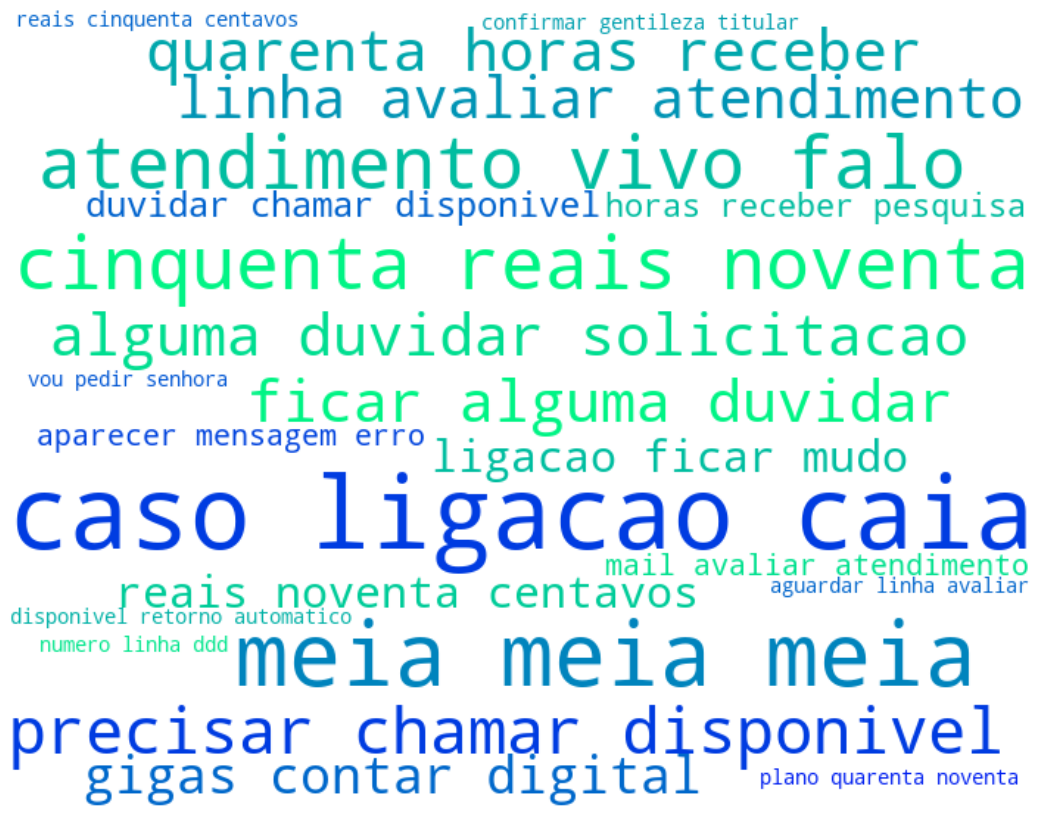

In [17]:
NlVisualization.wordCloud_Topics(filename,column_filter,column_text,whats_process)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


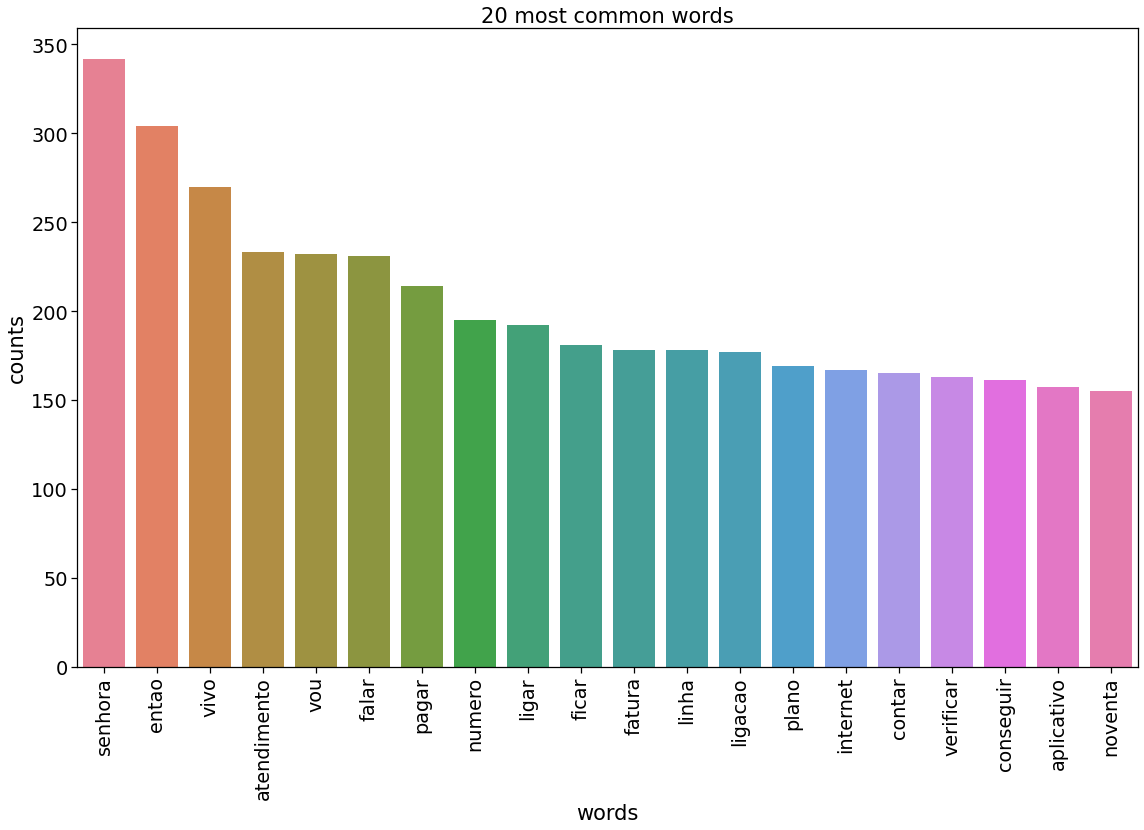

In [18]:
NlVisualization.plot_10_most_common_words(filename,column_filter,column_text)

[07/12 18:42:48] - [Info]:  plot graph of pareto with categorized


/opt/dna/find-keywords/api_model/nlvisualization.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


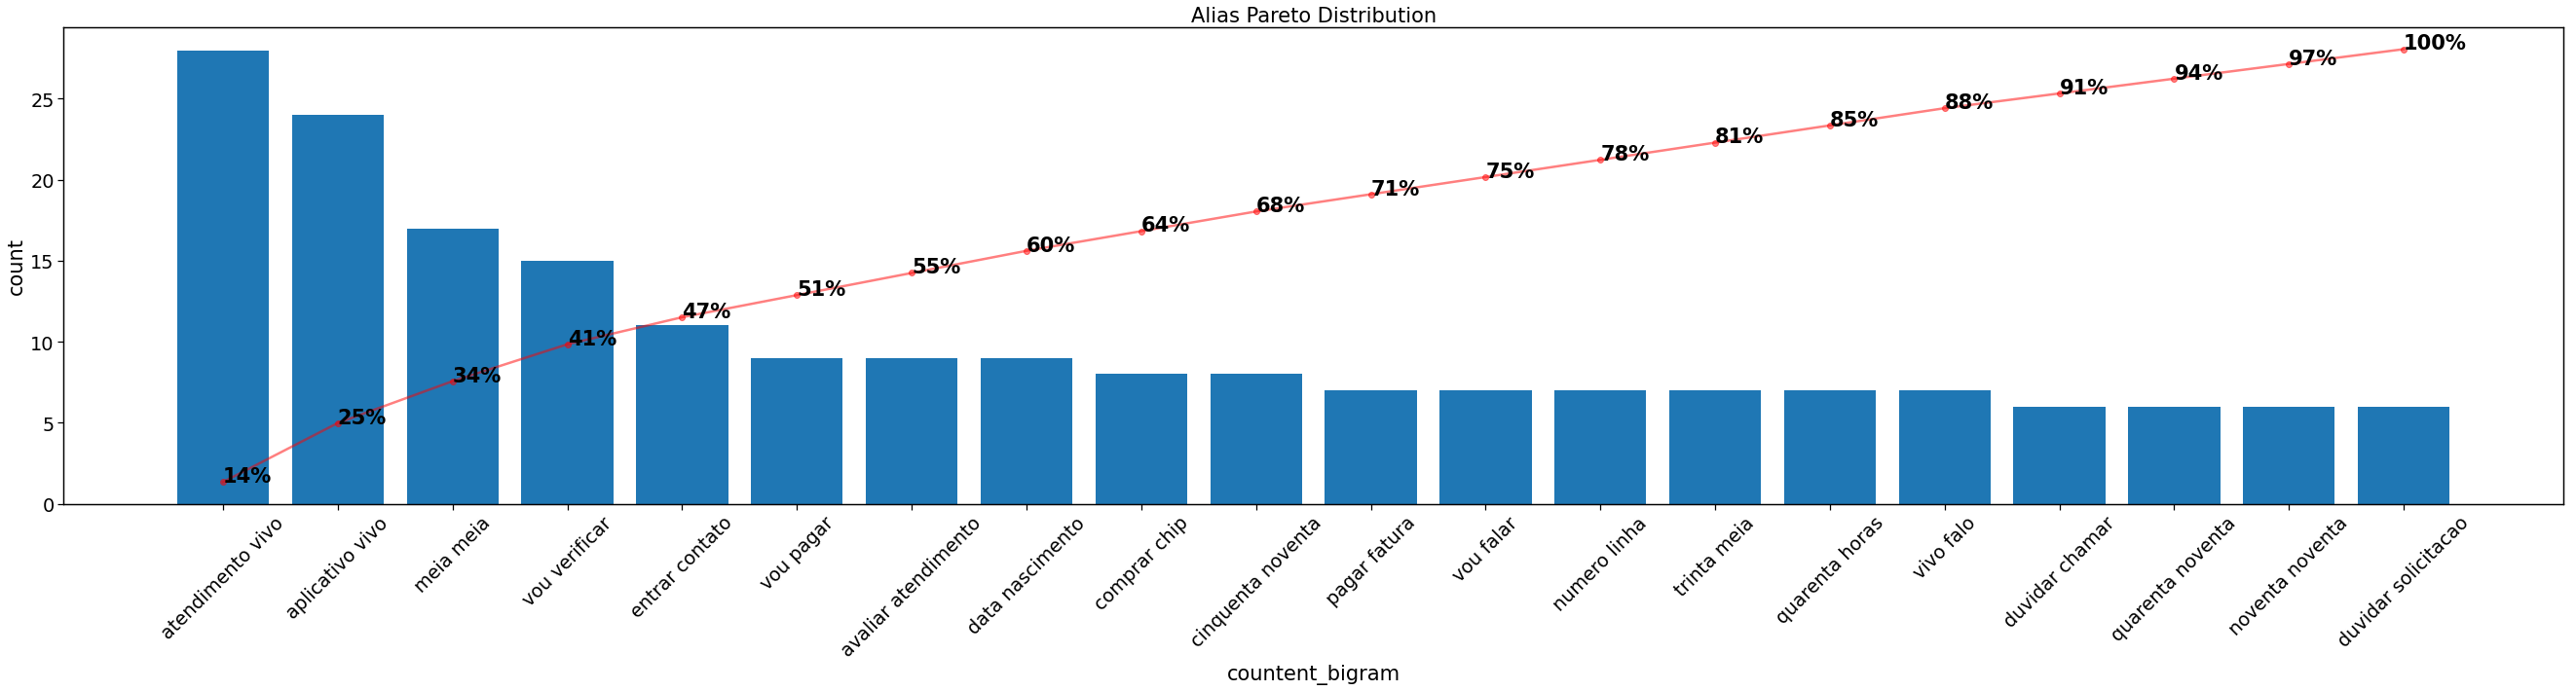

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (46, 9)
NlVisualization.pareto_plot(filename, x='countent_bigram', y='count', title='Alias Pareto Distribution', limite=20)

[07/12 18:42:50] - [Info]:  plot graph of maps words
[07/12 18:42:51] - [Debug]:  Time to build vocab: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


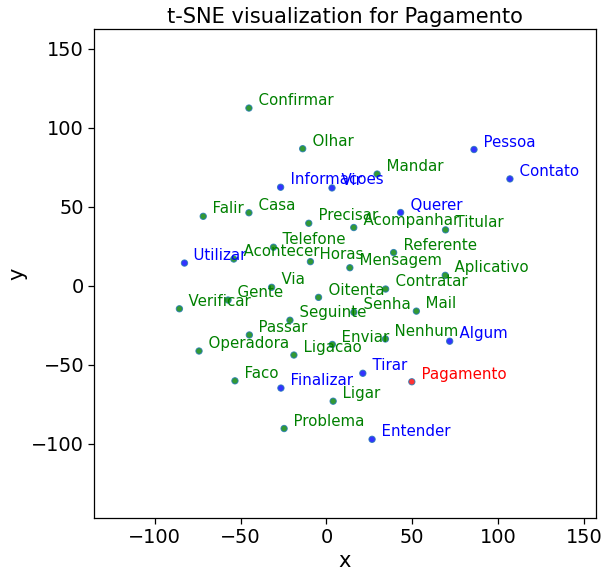

In [20]:
NlVisualization.tsne_plot(filename, column_text, 'pagamento', 40, n_iter=300, vector_size=300, min_count=20, window=30)

[07/12 18:42:57] - [Info]:  Start optmal clustering of kmeans model
[07/12 18:42:57] - [Info]:  Find number of clusters


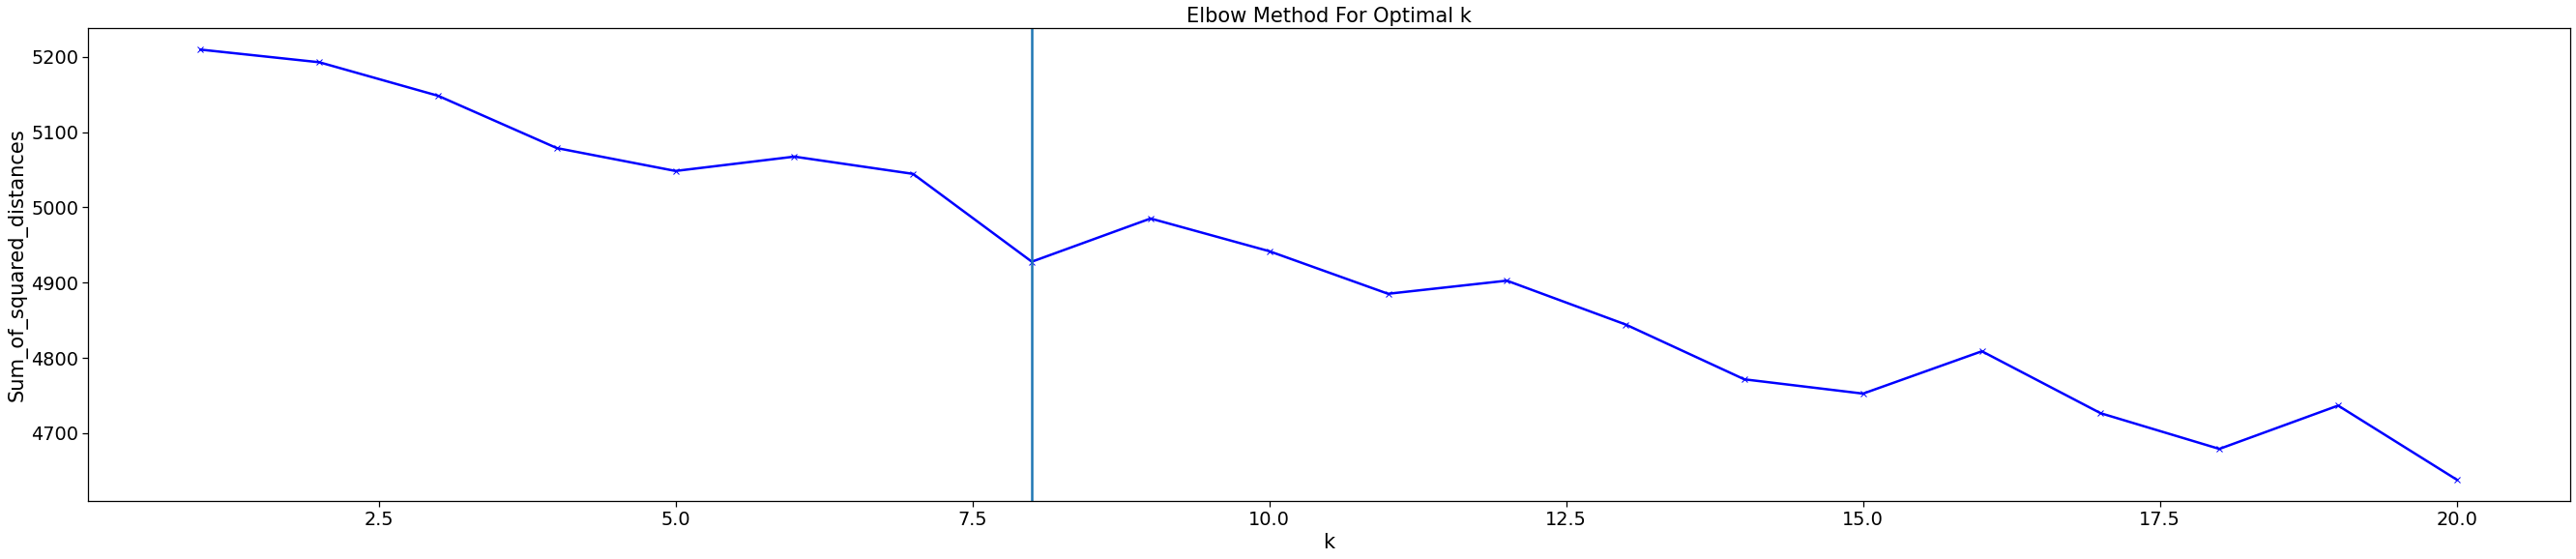

[07/12 18:43:00] - [Info]:  Optimal number of clusters: 8
[07/12 18:43:00] - [Info]:  Using model of optmal clustering finded
[07/12 18:43:04] - [Info]:  Dimension of Reduction from compreendition vectorial space
[07/12 18:43:58] - [Info]:  plot scatter of clustering


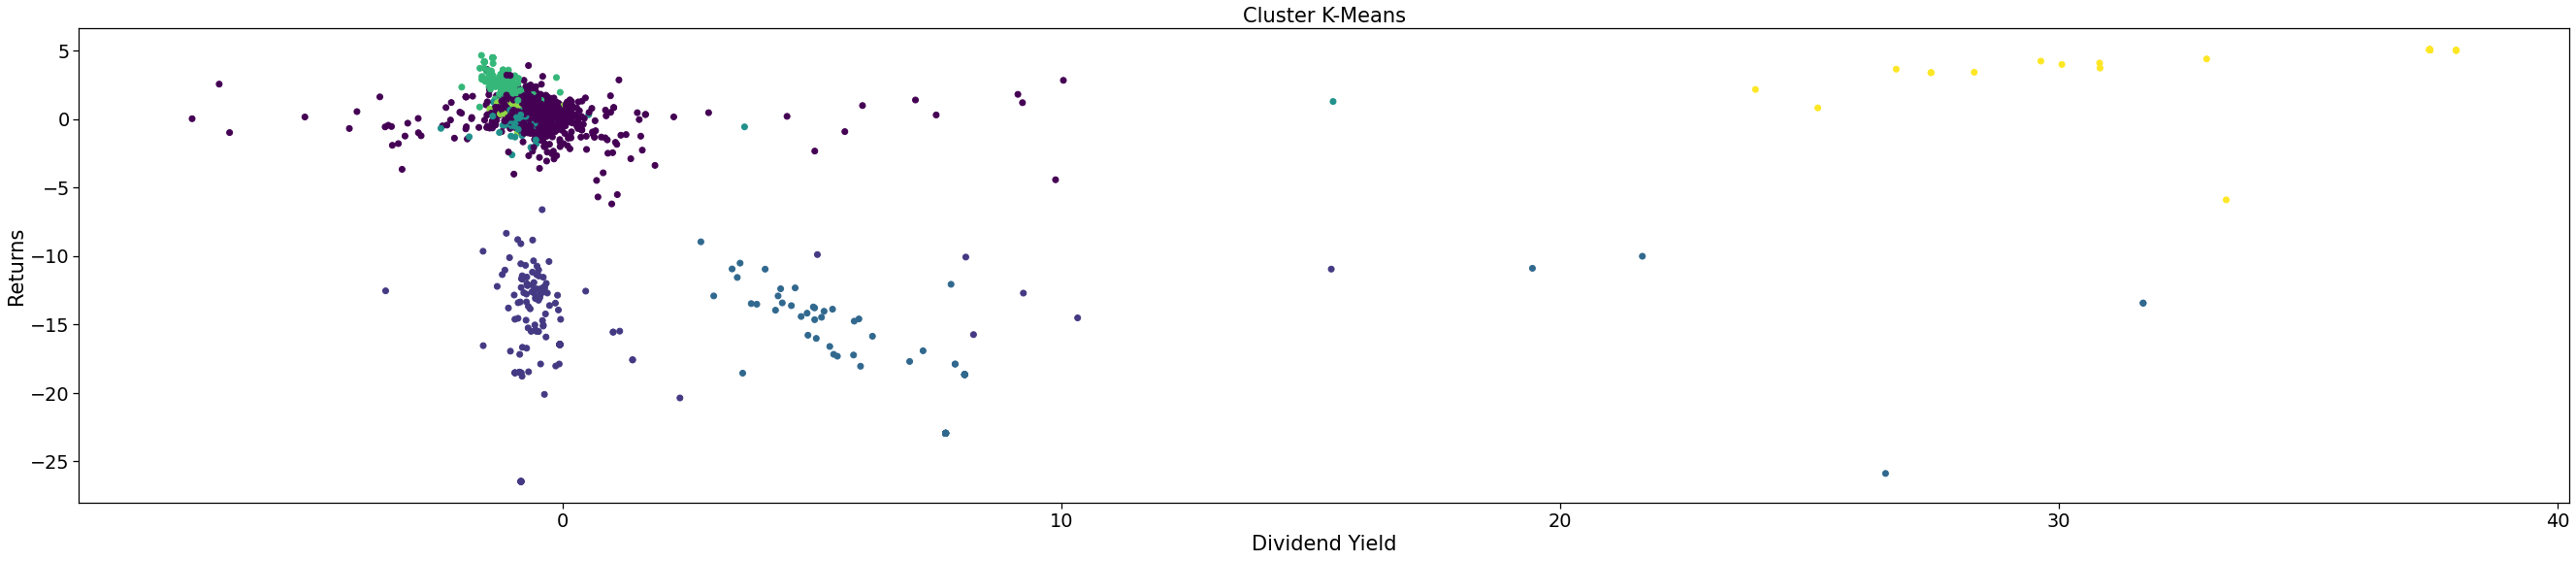

[07/12 18:43:59] - [Info]:  Predict model in dataframe, [0 0 0 ... 0 0 0]
[07/12 18:43:59] - [Info]:  save csf file
[07/12 18:43:59] - [Info]:  Finishing Process
[07/12 18:43:59] - [Info]:  New DataFrame Saved with Kmeans leabels


In [21]:
clst, optimal_k, df = NlVisualization.clustering_model(filename, column_text, model='kmeans', plot=True, max_k=20)

In [22]:
df.head()

,issue_id,message_time,PROB_2,message_order,numbers_words,PROB_1,message_author,has_attendant,concorrencia_findint,pedefacil_findint,...,satisfacao_findint,rechamada_findint,all_messages,all_messages_message_author_SPEAKER_00,all_messages_message_author_SPEAKER_01,original_messages,countent_word,countent_bigram,countent_trigram,ml_kmeans
0,Amostra2_80116883_7114999001213119952_24.wav,2022-07-12 21:36:10,64.635937,1,1,63.353438,SPEAKER_01,1,NaN,NaN,...,NaN,NaN,caminhar,NaN,caminhar,2022-07-12 21:36:10 - Author: SPEAKER_01 - Message: caminhar,caminhar,NaN,NaN,0
1,Amostra2_80274730_7114980370613877149_19.wav,2022-07-12 21:36:10,95.618437,1,7,90.235313,SPEAKER_00,1,NaN,NaN,...,NaN,NaN,duvidar solicitacao chamar mencionar daqui quarenta horas,duvidar solicitacao chamar mencionar daqui quarenta horas,NaN,2022-07-12 21:36:10 - Author: SPEAKER_00 - Message: duvidar solicitacao chamar mencionar daqui quarenta horas,mencionar,solicitacao chamar,NaN,0
2,Amostra2_80288045_7114959015004670216_12.wav,2022-07-12 21:36:10,33.974063,1,3,32.202188,SPEAKER_00,1,NaN,NaN,...,NaN,NaN,ligacao ligacao chamar,ligacao ligacao chamar,NaN,2022-07-12 21:36:10 - Author: SPEAKER_00 - Message: ligacao ligacao chamar,ligacao,ligacao chamar,NaN,0
3,Amostra2_80291615_7114993834336009779_106.wav,2022-07-12 21:36:10,1460.114063,1,2,1455.794063,SPEAKER_01,1,NaN,NaN,...,NaN,NaN,querer ctenomideo,NaN,querer ctenomideo,2022-07-12 21:36:10 - Author: SPEAKER_01 - Message: querer ctenomideo,querer,NaN,NaN,0
4,Amostra2_80363269_7115045220044049974_0.wav,2022-07-12 21:36:10,6.332812,1,3,3.362813,SPEAKER_00,1,NaN,NaN,...,NaN,NaN,atendimento vivo diadema,atendimento vivo diadema,NaN,2022-07-12 21:36:10 - Author: SPEAKER_00 - Message: atendimento vivo diadema,atendimento,atendimento vivo,NaN,4
